In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the Dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [14]:
y_train.shape

(50000, 1)

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [19]:
classes[9]

'truck'

In [20]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

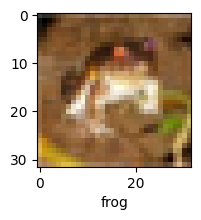

In [21]:
plot_sample(X_train, y_train, 0)

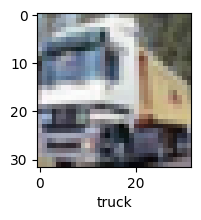

In [24]:
plot_sample(X_train, y_train, 1)

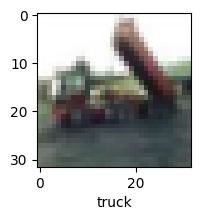

In [25]:
plot_sample(X_train, y_train, 2)

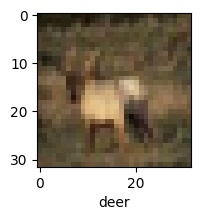

In [26]:
plot_sample(X_train, y_train, 3)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

# Normalizing the training data

In [29]:
X_train = X_train / 255.0
X_test = X_test / 255.0

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
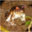

In [22]:
X_train[0]

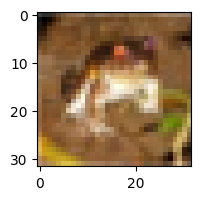

In [23]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])

array([[[213, 229, 242],
        [211, 227, 240],
        [211, 227, 240],
        ...,
        [151, 174, 206],
        [151, 174, 206],
        [149, 172, 204]],

       [[214, 229, 241],
        [212, 227, 239],
        [212, 227, 239],
        ...,
        [152, 175, 207],
        [152, 175, 207],
        [151, 174, 205]],

       [[216, 229, 239],
        [214, 227, 237],
        [213, 227, 237],
        ...,
        [153, 176, 206],
        [153, 176, 206],
        [151, 174, 204]],

       ...,

       [[145, 159, 165],
        [136, 148, 154],
        [143, 152, 158],
        ...,
        [216, 217, 206],
        [196, 197, 191],
        [183, 183, 182]],

       [[139, 153, 159],
        [129, 142, 148],
        [129, 139, 145],
        ...,
        [227, 228, 219],
        [223, 224, 219],
        [209, 209, 209]],

       [[137, 152, 157],
        [143, 155, 161],
        [136, 145, 152],
        ...,
        [209, 209, 203],
        [217, 217, 213],
        [228, 228, 226]]], dtype=uint8)
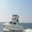

In [6]:
X_train[100]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]], dtype=uint8)
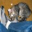

In [7]:
X_test[0]

## Build simple artificial neural network for image classification

In [30]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 137s 87ms/step - loss: 1.8164 - accuracy: 0.3523
Epoch 2/5
1563/1563 [==============================] - 136s 87ms/step - loss: 1.6279 - accuracy: 0.4249
Epoch 3/5
1563/1563 [==============================] - 129s 83ms/step - loss: 1.5441 - accuracy: 0.4553
Epoch 4/5
1563/1563 [==============================] - 132s 84ms/step - loss: 1.4841 - accuracy: 0.4780
Epoch 5/5
1563/1563 [==============================] - 135s 87ms/step - loss: 1.4333 - accuracy: 0.4956


In [33]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12230010 (46.65 MB)
Trainable params: 12230010 (46.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 12s 37ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.42      0.50      1000
           1       0.77      0.32      0.45      1000
           2       0.42      0.29      0.34      1000
           3       0.38      0.19      0.26      1000
           4       0.41      0.43      0.42      1000
           5       0.33      0.58      0.42      1000
           6       0.48      0.63      0.55      1000
           7       0.60      0.48      0.53      1000
           8       0.46      0.78      0.58      1000
           9       0.52      0.60      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



# Now let us build a convolutional neural network to train our images

In [53]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [54]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 68s 43ms/step - loss: 1.4757 - accuracy: 0.4671
Epoch 2/20
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1286 - accuracy: 0.6051
Epoch 3/20
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9943 - accuracy: 0.6534
Epoch 4/20
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9143 - accuracy: 0.6841
Epoch 5/20
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8492 - accuracy: 0.7074
Epoch 6/20
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7906 - accuracy: 0.7270
Epoch 7/20
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7465 - accuracy: 0.7412
Epoch 8/20
1563/1563 [==============================] - 57s 36ms/step - loss: 0.6948 - accuracy: 0.7590
Epoch 9/20
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6568 - accuracy: 0.7715
Epoch 10/20
1563/1563 [==============================] - 58s 37m

###**With CNN, at the end 5 epochs, accuracy was at around 81% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [56]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 1.2100 - accuracy: 0.6927


[1.209955096244812, 0.6927000284194946]

In [57]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 11ms/step


array([[1.68309853e-05, 1.83099178e-06, 8.52865912e-03, 7.36555040e-01,
        1.93494125e-05, 2.46631518e-01, 8.17629881e-03, 3.05178560e-06,
        2.05653105e-05, 4.68315448e-05],
       [7.57127236e-06, 4.53535989e-02, 1.37192185e-11, 4.49170345e-12,
        6.89872800e-17, 4.70498206e-13, 3.81579195e-15, 1.61743999e-16,
        9.54638779e-01, 8.84625795e-09],
       [6.46673958e-04, 1.13221947e-02, 8.58500152e-06, 1.89798317e-04,
        6.69500587e-05, 6.03780336e-06, 1.04666789e-07, 1.76359554e-05,
        9.83174503e-01, 4.56749415e-03],
       [5.75842619e-01, 2.95918539e-06, 2.08040830e-02, 7.11529210e-05,
        3.46683191e-06, 8.81518099e-06, 8.26551272e-08, 6.60713040e-09,
        4.03266042e-01, 8.28531881e-07],
       [1.60189795e-11, 2.39311557e-08, 6.00137631e-04, 7.12031946e-02,
        5.81067085e-01, 6.95756637e-04, 3.46433043e-01, 4.49525729e-11,
        7.40691917e-07, 3.39846267e-08]], dtype=float32)

In [58]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [59]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

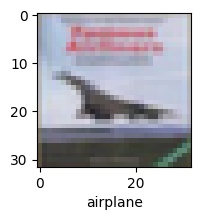

In [60]:
y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test,3)

In [61]:
classes[y_classes[3]]

'airplane'

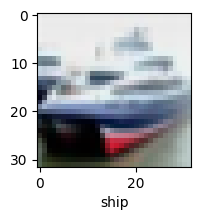

In [62]:
plot_sample(X_test, y_test,1)

In [63]:
classes[y_classes[1]]

'ship'

In [64]:
classes[y_classes[0]]

'cat'

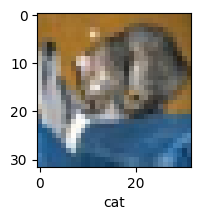

In [65]:
plot_sample(X_test, y_test,0)

In [66]:
classes[y_classes[3]]

'airplane'

In [67]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.73      0.73      1000
           1       0.81      0.81      0.81      1000
           2       0.58      0.62      0.60      1000
           3       0.52      0.51      0.51      1000
           4       0.68      0.58      0.63      1000
           5       0.58      0.63      0.61      1000
           6       0.73      0.79      0.76      1000
           7       0.80      0.68      0.73      1000
           8       0.76      0.81      0.79      1000
           9       0.76      0.77      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

